In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [2]:
g = 9.81
l = 1
gamma = 0.02
beta = 0.005

theta_0 = 0.2
theta_dot_0 = 0.1
phi_0 = 0.4
phi_dot_0 = 0.2

variable_list_0 = [theta_0, theta_dot_0, phi_0, phi_dot_0]

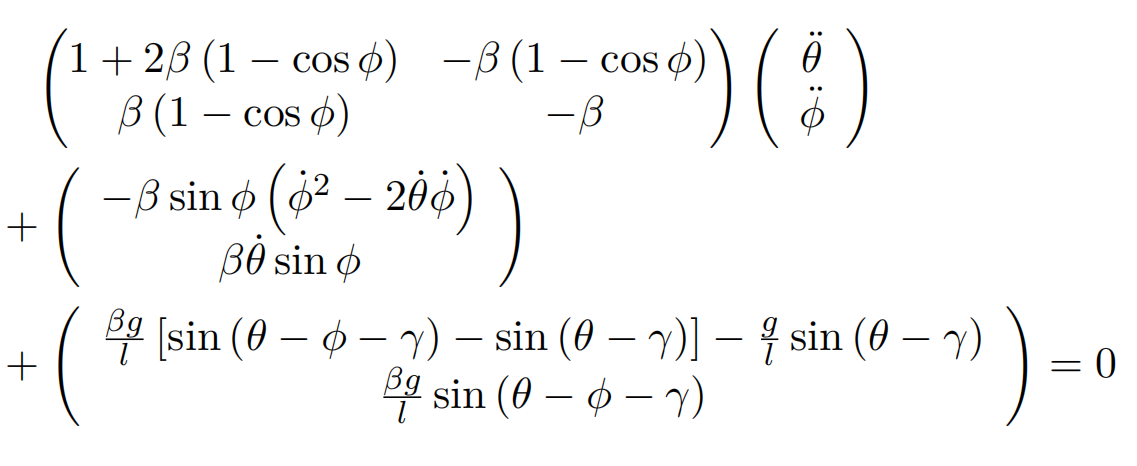

In [3]:
def equations(t, variable_list):

    theta, theta_dot, phi, phi_dot = variable_list

    matrix_A = np.array([[1+2*beta*(1-np.cos(phi)), -beta*(1-np.cos(phi))],
                         [beta*(1-np.cos(phi)),     -beta                ]])
    
    vector_B = np.array([-beta*np.sin(phi)*(phi_dot**2-2*theta_dot*phi_dot),
                         beta*theta_dot**2*np.sin(phi)                     ])
                         
    vector_C = np.array([beta*g/l*(np.sin(theta-phi-gamma)-np.sin(theta-gamma)-g/l*np.sin(theta-gamma)),
                         beta*g/l*np.sin(theta-phi-gamma)])

    theta_ddot, phi_ddot = np.linalg.solve(matrix_A, -vector_B-vector_C)
    
    return [theta_dot, theta_ddot, phi_dot, phi_ddot]

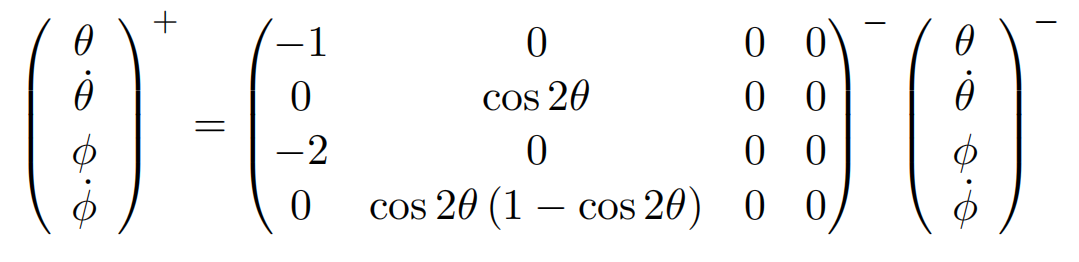

In [4]:
def heelstrike_event_and_change_defination(t, variable_list):

     theta, theta_dot, phi, phi_dot = variable_list

     matrix_Change = np.array([[-1, 0,                                   0, 0],
                               [0,  np.cos(2*theta),                     0, 0],
                               [-2,  0,                                  0, 0],
                               [0,  np.cos(2*theta)*(1-np.cos(2*theta)), 0, 0]])
     
     variable_matrix = np.array([[theta],
                                 [theta_dot],
                                 [phi],
                                 [phi_dot]])    

     result_matrix = np.dot(matrix_Change, variable_matrix)

     theta = result_matrix[0, 0]
     theta_dot = result_matrix[1, 0]
     phi = result_matrix[2, 0]
     phi_dot = result_matrix[3, 0]

     return [theta, theta_dot, phi, phi_dot]


In [5]:
def monitor(t, variable_list):

    theta, theta_dot, phi, phi_dot = variable_list
    print(f"t = {t} \n phi - 2*theta = {phi - 2*theta}\n")

    return phi - 2*theta

monitor.terminal = True
monitor.direction = 1

t = 0.0 
 phi - 2*theta = 0.0

t = 0.037006169145522794 
 phi - 2*theta = -0.0016081036191818998

t = 0.28836953128362064 
 phi - 2*theta = -0.09524914747352875

t = 0.4902465505442789 
 phi - 2*theta = -0.251600542314033

t = 0.6921235698049372 
 phi - 2*theta = -0.4298669489983199

t = 0.8940005890655954 
 phi - 2*theta = -0.5756460958873437

t = 1.0958776083262536 
 phi - 2*theta = -0.6499230826272662

t = 1.2977546275869116 
 phi - 2*theta = -0.6438348333982651

t = 1.4996316468475697 
 phi - 2*theta = -0.5817940129317622

t = 1.7015086661082277 
 phi - 2*theta = -0.5126958626720279

t = 1.9033856853688857 
 phi - 2*theta = -0.4911579357131475

t = 2.1802431124614934 
 phi - 2*theta = -0.6060684892436217

t = 2.306943101888839 
 phi - 2*theta = -0.7190280631521841

t = 2.433643091316185 
 phi - 2*theta = -0.862564767899566

t = 2.5603430807435306 
 phi - 2*theta = -1.0262122396644535

t = 2.6870430701708763 
 phi - 2*theta = -1.1972546173731684

t = 2.843510911224963 
 phi - 2*thet

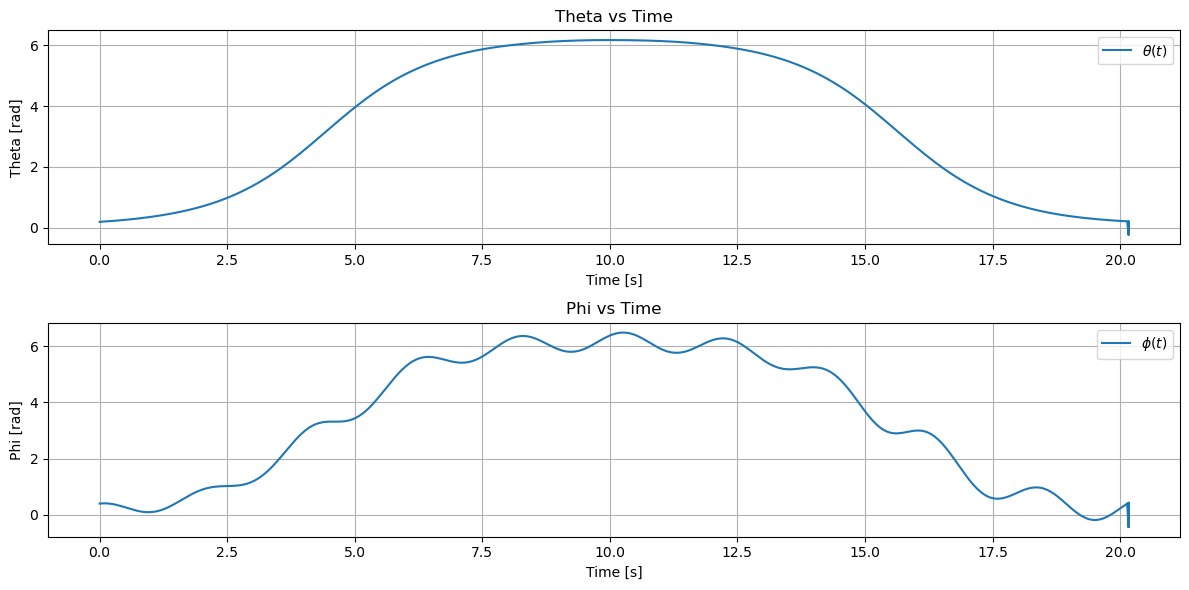

In [6]:
t_span = [0, 100]
t_eval = np.linspace(*t_span, 3000)
solution_list = []
current_t0 = t_span[0]

times = np.array([])
thetas = np.array([])
phis = np.array([])

max_points = 1000
points_collected = 0

while current_t0 < t_span[1] and points_collected < max_points:

    t_eval = np.linspace(current_t0, t_span[1], 3000)

    sol = solve_ivp(equations, [current_t0, t_span[1]], variable_list_0, method='Radau', t_eval=t_eval, events=monitor)
    
    print(sol)

    solution_list.append(sol)

    if len(sol.t_events[0]) > 0:
        current_t0 = sol.t_events[0][0]
        variable_list_0 = heelstrike_event_and_change_defination(current_t0, sol.y[:, -1])

        points_collected += len(sol.t)

        times = np.concatenate((times, sol.t))
        thetas = np.concatenate((thetas, sol.y[0]))
        phis = np.concatenate((phis, sol.y[2]))

        if len(times) >= max_points:
            break

    else:
        break


plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(times, thetas, label=r'$\theta(t)$')
plt.title('Theta vs Time')
plt.xlabel('Time [s]')
plt.ylabel('Theta [rad]')
plt.grid(True)
plt.legend()

"""
for sol in solution_list:
    for t_event in sol.t_events[0]:L
        plt.plot(t_event, np.interp(t_event, times, thetas), 'ro', markersize=10)
"""


plt.subplot(2, 1, 2)
plt.plot(times, phis, label=r'$\phi(t)$')
plt.title('Phi vs Time')
plt.xlabel('Time [s]')
plt.ylabel('Phi [rad]')
plt.grid(True)
plt.legend()

"""
for sol in solution_list:
    for t_event in sol.t_events[0]:
        plt.plot(t_event, np.interp(t_event, times, phis), 'ro', markersize=10)
"""

plt.tight_layout()
plt.show()
